# importing packages and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import tensorflow as tf





# importing Datasets

In [2]:
df1 = pd.read_csv("C:\\Users\\bhanu\\OneDrive\\Desktop\\NLP\\True (1).csv", encoding='latin1',
                  on_bad_lines='skip') 
df1

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21406,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21407,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21408,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21409,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
df2 = pd.read_csv("C:\\Users\\bhanu\\OneDrive\\Desktop\\NLP\\Fake (1).csv",encoding='latin-1',on_bad_lines='skip')  
df2

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23461,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23462,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23463,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23464,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
# Concatenate the datasets
df3 = pd.concat([df1, df2], ignore_index=True)
df3

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
44872,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44873,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44874,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44875,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# EDA 

In [5]:
df3.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
df3.tail()

,title,text,subject,date
44872,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
44873,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
44874,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
44875,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
44876,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [7]:
df3.shape

(44877, 4)

In [8]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44877 entries, 0 to 44876
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44877 non-null  object
 1   text     44875 non-null  object
 2   subject  44875 non-null  object
 3   date     44870 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [9]:
df3.describe()

,title,text,subject,date
count,44877,44875,44875,44870
unique,38716,38630,11,2397
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017"
freq,14,627,11266,182


In [10]:
df3.isnull()

,title,text,subject,date
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
44872,False,False,False,False
44873,False,False,False,False
44874,False,False,False,False
44875,False,False,False,False


In [5]:
missing_values = df3.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 title      0
text       2
subject    2
date       7
dtype: int64


In [6]:
df3.fillna("<MISSING>", inplace=True)

In [7]:
missing_values = df3.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 title      0
text       0
subject    0
date       0
dtype: int64


In [8]:
duplicate_records = df3[df3.duplicated()]
print("Duplicate records:", duplicate_records)


Duplicate records:                                                    title  \
445    Senate tax bill stalls on deficit-focused 'tri...   
778    Trump warns 'rogue regime' North Korea of grav...   
892    Republicans unveil tax cut bill, but the hard ...   
896    Trump taps Fed centrist Powell to lead U.S. ce...   
974    Two ex-Trump aides charged in Russia probe, th...   
...                                                  ...   
21347  Thailand's ousted PM Yingluck has fled abroad:...   
21402  U.S., North Korea clash at U.N. forum over nuc...   
31348  HILLARY TWEETS MESSAGE In Defense Of DACA&OOPS...   
32850  FORMER DEMOCRAT WARNS Young Americans: Rioter...   
36329  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...   

                                                    text       subject  \
445    WASHINGTON (Reuters) - The U.S. Senate on Thur...  politicsNews   
778    BEIJING (Reuters) - U.S. President Donald Trum...  politicsNews   
892    WASHINGTON (Reuters) - U.S. Hou

In [9]:
df3.drop_duplicates(inplace=True)


In [10]:
text=df3["text"]
text

0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3        WASHINGTON (Reuters) - Trump campaign adviser ...
4        SEATTLE/WASHINGTON (Reuters) - President Donal...
                               ...                        
44872    21st Century Wire says As 21WIRE reported earl...
44873    21st Century Wire says It s a familiar theme. ...
44874    Patrick Henningsen  21st Century WireRemember ...
44875    21st Century Wire says Al Jazeera America will...
44876    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 44668, dtype: object

# applying tokenization

In [11]:
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens


In [12]:
# Apply the tokenization function to the 'text' column
df3['tokenized_text'] = df3['text'].apply(tokenize_text)

df3['tokenized_text']

0        [WASHINGTON, (, Reuters, ), -, The, head, of, ...
1        [WASHINGTON, (, Reuters, ), -, Transgender, pe...
2        [WASHINGTON, (, Reuters, ), -, The, special, c...
3        [WASHINGTON, (, Reuters, ), -, Trump, campaign...
4        [SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...
                               ...                        
44872    [21st, Century, Wire, says, As, 21WIRE, report...
44873    [21st, Century, Wire, says, It, s, a, familiar...
44874    [Patrick, Henningsen, 21st, Century, WireRemem...
44875    [21st, Century, Wire, says, Al, Jazeera, Ameri...
44876    [21st, Century, Wire, says, As, 21WIRE, predic...
Name: tokenized_text, Length: 44668, dtype: object

In [13]:
# Display the tokenized text for the first few rows
for index, row in df3.head().iterrows():
    print(f"Row {index}:")
    print(row['tokenized_text'])

Row 0:
['WASHINGTON', '(', 'Reuters', ')', '-', 'The', 'head', 'of', 'a', 'conservative', 'Republican', 'faction', 'in', 'the', 'U.S.', 'Congress', ',', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', ',', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'Sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', '.', 'In', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'Republicans', ',', 'U.S.', 'Representative', 'Mark', 'Meadows', ',', 'speaking', 'on', 'CBS\x19', 'Face', 'the', 'Nation', ',', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', ',', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'January', '.', 'When', 'they', 'return', 'from', 'the', 'holidays', 'on', 'Wednesday', ',', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', '

# stopwords

In [14]:
from nltk.corpus import stopwords

# Example: Remove English stopwords
stopwords_list = set(stopwords.words('english'))
stopwords_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:

df3['filtered_tokens']= df3['tokenized_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords_list])

In [16]:
df3['filtered_tokens']

0        [WASHINGTON, (, Reuters, ), -, head, conservat...
1        [WASHINGTON, (, Reuters, ), -, Transgender, pe...
2        [WASHINGTON, (, Reuters, ), -, special, counse...
3        [WASHINGTON, (, Reuters, ), -, Trump, campaign...
4        [SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...
                               ...                        
44872    [21st, Century, Wire, says, 21WIRE, reported, ...
44873    [21st, Century, Wire, says, familiar, theme, ....
44874    [Patrick, Henningsen, 21st, Century, WireRemem...
44875    [21st, Century, Wire, says, Al, Jazeera, Ameri...
44876    [21st, Century, Wire, says, 21WIRE, predicted,...
Name: filtered_tokens, Length: 44668, dtype: object

In [17]:
# Define additional custom stopwords
custom_stopwords = {'WASHINGTON', 'Reuters', 'head', 'conservation','SEATTLE/WASHINGTON','Transgender','special','Trump','campaign','21st','Century',' Wire','says','21WIRE','reported','familiar',' theme','predicted','Henningsen','said','Said','US'}


In [18]:
# Add custom stopwords to the set
stopwords_list.update(custom_stopwords)

In [19]:
stopwords_list

{' Wire',
 ' theme',
 '21WIRE',
 '21st',
 'Century',
 'Henningsen',
 'Reuters',
 'SEATTLE/WASHINGTON',
 'Said',
 'Transgender',
 'Trump',
 'US',
 'WASHINGTON',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'campaign',
 'can',
 'conservation',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'familiar',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'head',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'm

# Tokenization, Normalization, and Lemmatization

In [20]:
# Tokenization, Normalization, and Lemmatization
lemmatizer = WordNetLemmatizer()

In [21]:
def process_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text
    # Tokenization
    tokens = word_tokenize(text)
    tokens
    # Normalization
    tokens = [token.lower() for token in tokens]
    tokens
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

df3['processed_text'] = df3['text'].apply(process_text)

# Remove stopwords
df3['filtered_tokens'] = df3['processed_text'].apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords_list])


# Data Visualization

In [ ]:
# the VADER sentiment analyzer

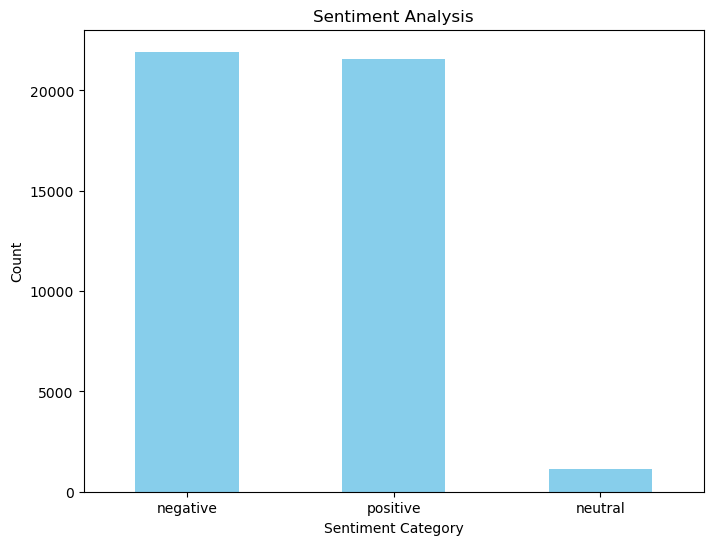

In [22]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each text in the DataFrame
df3['sentiment'] = df3['text'].apply(lambda x: sid.polarity_scores(str(x))['compound'])

# Classify sentiment into categories (positive, neutral, negative)
df3['sentiment_category'] = df3['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df3['sentiment_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# word cloud

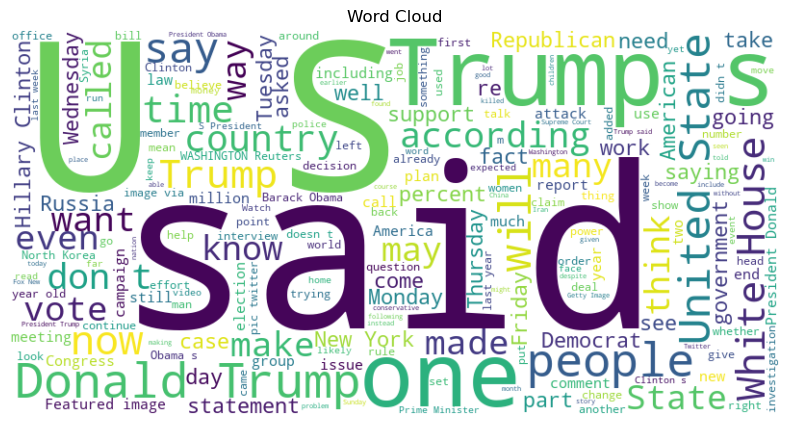

In [29]:
# Data Visualization - Word Cloud
text_data = " ".join(df3['text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

# Data modelling

# CNN (Convolutional neural network)

In [30]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df3['filtered_tokens'], df3['subject'], test_size=0.2, random_state=42)


In [31]:
# Label encoding for training set
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Check for unseen labels in test set
unseen_labels = set(y_test) - set(label_encoder.classes_)

if unseen_labels:
    print("Unseen labels in test set:", unseen_labels)
    # Filter out unseen labels from test set
    mask = y_test.isin(label_encoder.classes_)
    X_test_filtered = X_test[mask]
    y_test_filtered = y_test[mask]
else:
    X_test_filtered = X_test
    y_test_filtered = y_test

# Encode filtered test set labels
y_test_encoded = label_encoder.transform(y_test_filtered)

# Tokenization and padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test_filtered)
max_sequence_length = max([len(seq) for seq in X_train_seq + X_test_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')



In [32]:
# Define CNN model
cnn_model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100),
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),
    Dense(units=len(label_encoder.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train CNN model
cnn_model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=32, validation_data=(X_test_pad, y_test_encoded))


Epoch 1/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 416s 369ms/step - accuracy: 0.6920 - loss: 0.8319 - val_accuracy: 0.8178 - val_loss: 0.3859
Epoch 2/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 481s 431ms/step - accuracy: 0.8352 - loss: 0.3298 - val_accuracy: 0.8143 - val_loss: 0.3884
Epoch 3/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 486s 435ms/step - accuracy: 0.8554 - loss: 0.2778 - val_accuracy: 0.8077 - val_loss: 0.3938
Epoch 4/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 452s 405ms/step - accuracy: 0.8698 - loss: 0.2487 - val_accuracy: 0.7829 - val_loss: 0.4223
Epoch 5/5
1117/1117 ━━━━━━━━━━━━━━━━━━━━ 571s 511ms/step - accuracy: 0.8701 - loss: 0.2339 - val_accuracy: 0.7617 - val_loss: 0.4676


In [33]:
# Evaluate CNN model
cnn_pred = cnn_model.predict(X_test_pad)
cnn_acc = accuracy_score(y_test_encoded, np.argmax(cnn_pred, axis=1))
print("CNN Accuracy:", cnn_acc)
cnn_mse = mean_squared_error(y_test_encoded, np.argmax(cnn_pred, axis=1))
print("CNN Mean Squared Error:", cnn_mse)

280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step
CNN Accuracy: 0.7616968882919185
CNN Mean Squared Error: 2.723080367136781


# Naive Bayes

In [34]:
# Assuming you have a dataset with 'text' and 'label' columns
X = df3['text']
y = df3['sentiment_category']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.739646295052608
              precision    recall  f1-score   support

    negative       0.74      0.75      0.74      4408
     neutral       1.00      0.00      0.01       217
    positive       0.74      0.76      0.75      4309

    accuracy                           0.74      8934
   macro avg       0.83      0.51      0.50      8934
weighted avg       0.75      0.74      0.73      8934



# Random Forest classifier

In [44]:
# Assuming you have a dataset with 'text' and 'sentiment_category' columns
# Split the dataset into features (X) and target labels (y)
X = df3['text']
y = df3['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7952142459654981
Classification Report:
              precision    recall  f1-score   support

    negative       0.80      0.79      0.80      4392
     neutral       0.97      0.74      0.84       230
    positive       0.78      0.80      0.79      4363

    accuracy                           0.80      8985
   macro avg       0.85      0.78      0.81      8985
weighted avg       0.80      0.80      0.80      8985



# Logistic Regression

In [47]:
# Assuming you have a dataset with 'text' and 'sentiment_category' columns
# Split the dataset into features (X) and target labels (y)
X = df3['text']
y = df3['sentiment_category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the classifier (Logistic Regression in this case)
classifier = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7896494156928213
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.79      0.79      4392
     neutral       0.93      0.72      0.81       230
    positive       0.78      0.79      0.79      4363

    accuracy                           0.79      8985
   macro avg       0.84      0.77      0.80      8985
weighted avg       0.79      0.79      0.79      8985



# SVM (Support Vector Machine) 

In [25]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text


# Preprocess the text data
df3['text'] = df3['text'].apply(preprocess_text)

# Split data into features and labels
X = df3['text']
y = df3['subject']

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X_tfidf = vectorizer.fit_transform(X)

# Initialize SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_tfidf, y)

# Make predictions
y_pred = svm_classifier.predict(X_tfidf)

# Evaluate the model
accuracy = accuracy_score(y, y_pred)
print(f'Accuracy: {accuracy}')

# Display classification report
print(classification_report(y, y_pred))


Accuracy: 0.8443404674487329


C:\New folder\New folder\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\New folder\New folder\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

      <MISSING>       1.00      1.00      1.00         2
    Feb 8, 2017       0.00      0.00      0.00         2
Government News       0.77      0.13      0.23      1569
   Mar 14, 2016       0.00      0.00      0.00         1
    Middle-east       0.00      0.00      0.00       778
           News       0.99      0.99      0.99      9050
   Nov 27, 2016       0.00      0.00      0.00         2
        US_News       0.50      0.99      0.67       783
      left-news       0.61      0.24      0.35      4450
       politics       0.57      0.90      0.70      6826
   politicsNews       0.97      0.97      0.97     11214
      worldnews       0.96      0.97      0.97      9991

       accuracy                           0.84     44668
      macro avg       0.53      0.52      0.49     44668
   weighted avg       0.84      0.84      0.82     44668



C:\New folder\New folder\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the above Data modelling methods we can see that the SVM classifier is driving the high accuracy

In [26]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for data preprocessing and model
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cuts off texts after this number of words (among the max_features most common words)
batch_size = 32
embedding_dim = 50  # Dimension of the embedding space
units = 32  # Dimension of the output space of the RNN layer

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Preprocess the data: pad sequences to ensure uniform length
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the RNN model
model = Sequential()
model.add(Embedding(max_features, embedding_dim))
model.add(SimpleRNN(units, return_sequences=True))  # Return sequences to stack RNN layers
model.add(SimpleRNN(units))  # Last RNN layer doesn't return sequences
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 122ms/step - accuracy: 0.6383 - loss: 0.6085 - val_accuracy: 0.7682 - val_loss: 0.4977
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.8519 - loss: 0.3513 - val_accuracy: 0.8446 - val_loss: 0.3590
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1274s 2s/step - accuracy: 0.8949 - loss: 0.2709 - val_accuracy: 0.8474 - val_loss: 0.3918
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9283 - loss: 0.1914 - val_accuracy: 0.8434 - val_loss: 0.4825
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 118ms/step - accuracy: 0.9577 - loss: 0.1185 - val_accuracy: 0.7996 - val_loss: 0.5370
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.9779 - loss: 0.0664 - val_accuracy: 0.7812 - val_loss: 0.6540
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 119ms/step - accuracy: 0.9879 - loss: 0.0380 - val_accuracy: 0.7604 - val_loss: 0.8691
Epoch 8/10
625/625 ━━━━━━━━━━━━━━

In [27]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for data preprocessing and model
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cuts off texts after this number of words (among the max_features most common words)
batch_size = 32
embedding_dim = 50  # Dimension of the embedding space
units = 32  # Dimension of the output space of the GRU layer

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Preprocess the data: pad sequences to ensure uniform length
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the GRU model
model = Sequential()
model.add(Embedding(max_features, embedding_dim))
model.add(GRU(units))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 126ms/step - accuracy: 0.6564 - loss: 0.5882 - val_accuracy: 0.8050 - val_loss: 0.4579
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.8666 - loss: 0.3322 - val_accuracy: 0.8418 - val_loss: 0.3679
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.8989 - loss: 0.2602 - val_accuracy: 0.8848 - val_loss: 0.2867
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9209 - loss: 0.2133 - val_accuracy: 0.8914 - val_loss: 0.2720
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.9272 - loss: 0.1964 - val_accuracy: 0.8978 - val_loss: 0.2575
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9431 - loss: 0.1571 - val_accuracy: 0.9004 - val_loss: 0.2702
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 128ms/step - accuracy: 0.9549 - loss: 0.1283 - val_accuracy: 0.9004 - val_loss: 0.2675
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 126ms/step - accuracy: 0.9635 - loss: 0

In [28]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters for data preprocessing and model
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cuts off texts after this number of words (among the max_features most common words)
batch_size = 32
embedding_dim = 50  # Dimension of the embedding space
hidden_units = 64  # Number of hidden units in the dense layer
dropout_rate = 0.5  # Dropout rate to prevent overfitting

# Load the IMDb dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Preprocess the data: pad sequences to ensure uniform length
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the neural network model
model = Sequential()
model.add(Embedding(max_features, embedding_dim, input_length=maxlen))
model.add(Flatten())  # Flatten the embedding vectors
model.add(Dense(hidden_units, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=batch_size,
                    validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Epoch 1/10


C:\New folder\New folder\New folder\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6583 - loss: 0.5707 - val_accuracy: 0.8756 - val_loss: 0.2964
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9479 - loss: 0.1516 - val_accuracy: 0.8606 - val_loss: 0.3502
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9934 - loss: 0.0276 - val_accuracy: 0.8554 - val_loss: 0.5325
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9985 - loss: 0.0070 - val_accuracy: 0.8464 - val_loss: 0.6252
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9999 - loss: 0.0025 - val_accuracy: 0.8558 - val_loss: 0.6715
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8548 - val_loss: 0.7386
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9980 - loss: 0.0065 - val_accuracy: 0.8374 - val_loss: 0.8610
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.9944 - loss: 0.0157 - val_accurac